Exploratory data analysis and visualization of employee churn dataset using matplotlib and seaborn, model building and evaluation using python scikit-learn package.

Predicting Employee Churn with Machine Learning (Colab)

Classification model trained on 1,470 employees

The dataset contains 1470 samples, and 32 features


In [ ]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
#MODEL
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read dataset into df dataframe from Data Directory and display top and bottom rows of the dataframe
df=pandas.read_csv('/content/drive/MyDrive/Data/Attrition.csv')
df

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,1,884,1,23,2,3,2061,...,3,3,1,17,3,3,5,2,0,3
1466,1466,39,0,2,613,1,6,1,3,2062,...,3,1,1,9,5,3,7,7,1,7
1467,1467,27,0,2,155,1,4,3,1,2064,...,4,2,1,6,0,3,6,2,0,3
1468,1468,49,0,1,1023,2,2,3,3,2065,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   Attrition                 1470 non-null   int64
 3   BusinessTravel            1470 non-null   int64
 4   DailyRate                 1470 non-null   int64
 5   Department                1470 non-null   int64
 6   DistanceFromHome          1470 non-null   int64
 7   Education                 1470 non-null   int64
 8   EducationField            1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [ ]:
df.isnull().sum() # another way to count null values in dataset

Unnamed: 0                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int

In this dataset, we have two types of employee, those who stayed and those that left the company. Compare their characteristics by group (the column 'left'). Here, you can find the average of both the groups using groupby() and mean() function.

In [ ]:
left = df.groupby('Attrition') #  (1=left, 0=remain with Co)
left.mean() # mean of the variables group by 'Attrition' 

,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,736.429035,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1027.656123,2.771290,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,724.464135,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1010.345992,2.464135,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


Use the 'describe()' function in pandas to get various summary statistics. 

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data (except 'Departments' and 'salary' are not in the output as they are not numeric but objects)

In [ ]:
df.describe() # Summary statistics of dataframe ~ use '.T' to transpose the table

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Data Visualization**

Compare the number of employees that left the company 'left' = 1 and those that stayed 'left' = 0

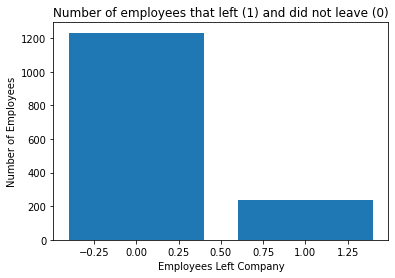

In [ ]:
left_count=df.groupby('Attrition').count()
plt.bar(left_count.index.values, left_count['JobSatisfaction'])
plt.title('Number of employees that left (1) and did not leave (0)')
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [ ]:
#Here, you can see that out of 1,470 approx 237 left ('left' column =1), and 1,233 stayed. The no of employee left is 19 % of the total employees.
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [ ]:
#Here, you can see that out of 15,000 approx 319  got a promotion within last 5 yrs. ('promotion_last_5years' column =1), and 14,680 did not get a promotion. The no of employee promoted is 2.12% of the total employee.
df.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

Number of Projects

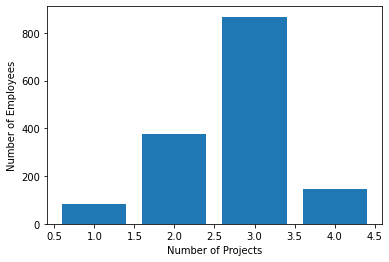

In [ ]:
# bar chart to show the number of projects employees are involved in?
num_projects=df.groupby('JobInvolvement').count()
plt.bar(num_projects.index.values, num_projects['JobSatisfaction'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

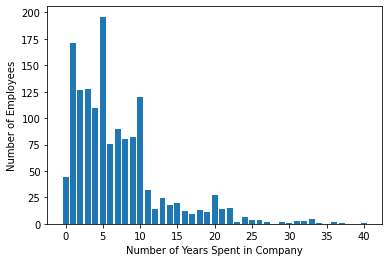

In [ ]:
#Time Spent in Company ~ as an indicator of employee work experience
# bar chart to show the number of employees and their years of experience in the company?
time_spent=df.groupby('YearsAtCompany').count()
plt.bar(time_spent.index.values, time_spent['JobSatisfaction'])
plt.xlabel('Number of Years Spent in Company')
plt.ylabel('Number of Employees')
plt.show()


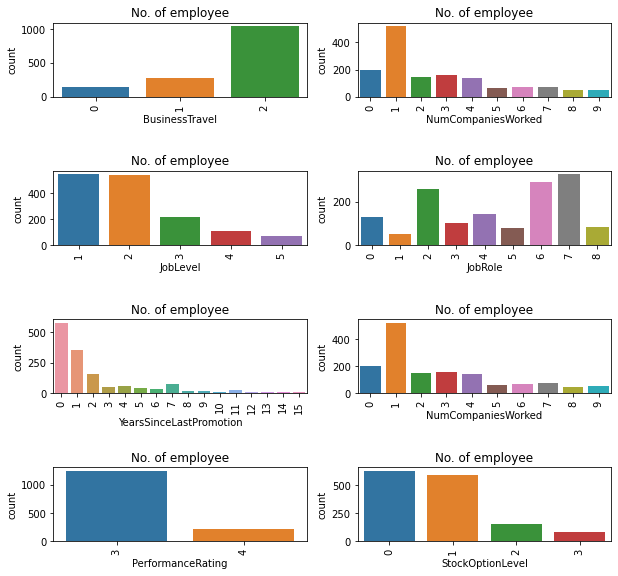

In [ ]:
#Subplots using Seaborn library to plot all the graphs in a single cell.
features=['BusinessTravel','NumCompaniesWorked', 'JobLevel', 'JobRole', 'YearsSinceLastPromotion'
          ,  'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

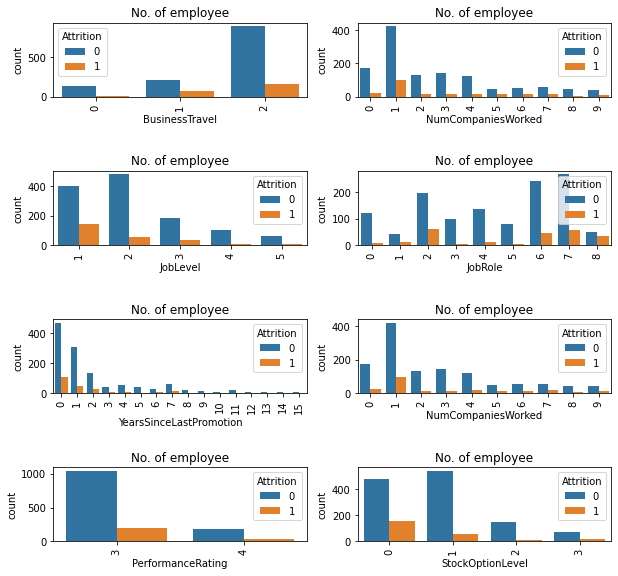

In [ ]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(6, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Cluster Analysis:

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [ ]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df[['YearsAtCompany', 'YearsSinceLastPromotion']][df.Attrition == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

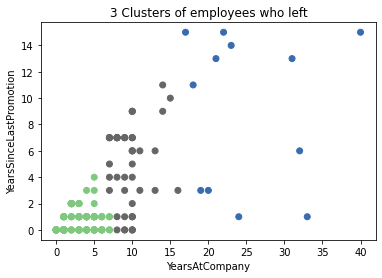

In [ ]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['YearsAtCompany'], left_emp['YearsSinceLastPromotion'], c=left_emp['label'],cmap='Accent')
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsSinceLastPromotion')
plt.title('3 Clusters of employees who left')
plt.show()


Here, Employee who left the company can be grouped into 3 type of employees:
High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

Building a Prediction Model

Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [ ]:
df # see 'Departments' & 'salary' columns. 

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,2,1102,2,1,2,1,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,0,1,279,1,8,1,1,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1,2,1373,1,2,2,4,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,0,1,1392,1,3,4,1,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,0,2,591,1,2,1,3,7,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,1,884,1,23,2,3,2061,...,3,3,1,17,3,3,5,2,0,3
1466,1466,39,0,2,613,1,6,1,3,2062,...,3,1,1,9,5,3,7,7,1,7
1467,1467,27,0,2,155,1,4,3,1,2064,...,4,2,1,6,0,3,6,2,0,3
1468,1468,49,0,1,1023,2,2,3,3,2065,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
n = df.nunique(axis=0) # unique values in dataframe
n

Unnamed: 0                  1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCur

In [ ]:

#imported preprocessing module and created Label Encoder object to fit and transform "salary" and "Departments " column into numeric column.
# there are 3 levels of 'Salary' ~ "Low", "Medium" & "High"
# There are 10 'Department' ~ "accounting","hr","IT","management","marketing","product_mng","RandD","sales",suppport",& "technical" 
# Import LabelEncoder
#from sklearn import preprocessing
#creating labelEncoder
#le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#df['salary']=le.fit_transform(df['salary'])
#df['Departments ']=le.fit_transform(df['Departments '])

Split the dataframe into Training and Testing Set using sklearn

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Divide the dataset into training and testing set by splitting the HRdf dataset using the function "train_test_split()" function. 

3 parameters are needed as input to the function: features, target, and test_set size, typically 25 to 30% for testing.

Use random_state to select records randomly.

In [ ]:
# create the X and y variable array 
X=df[['BusinessTravel','NumCompaniesWorked', 'JobLevel', 'JobRole', 'YearsSinceLastPromotion'
          ,  'NumCompaniesWorked', 'PerformanceRating', 'StockOptionLevel']] 
y=df['Attrition'] # the target variable is the 'left' variable ~ put column into 'y'

In [ ]:
X

,BusinessTravel,NumCompaniesWorked,JobLevel,JobRole,YearsSinceLastPromotion,NumCompaniesWorked,PerformanceRating,StockOptionLevel
0,2,8,2,7,0,8,3,0
1,1,1,2,6,1,1,4,1
2,2,6,1,2,0,6,3,0
3,1,1,1,6,3,1,3,0
4,2,9,1,2,2,9,3,1
...,...,...,...,...,...,...,...,...
1465,1,4,2,2,0,4,3,1
1466,2,4,3,0,1,4,3,1
1467,2,1,2,4,0,1,4,1
1468,1,2,2,7,0,2,3,0


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [ ]:
X_test

,BusinessTravel,NumCompaniesWorked,JobLevel,JobRole,YearsSinceLastPromotion,NumCompaniesWorked,PerformanceRating,StockOptionLevel
1041,2,0,2,7,1,0,3,0
184,2,1,2,4,1,1,3,2
1222,2,1,1,1,0,1,3,1
67,2,2,3,6,0,2,3,1
220,2,8,2,2,3,8,3,0
...,...,...,...,...,...,...,...,...
1047,1,0,2,7,0,0,3,2
331,0,0,2,7,1,0,3,1
323,2,5,1,6,2,5,3,0
654,2,8,2,1,0,8,3,2


**Model Building **

**There are a number of classification models:**
1.   logistic regression 
2.   decision tree
1.   random forest
1.   gradient-boosted tree
2.   multilayer perceptron
2.   one-vs-rest
1.   Naive Bayes
1.   Support Vector Machine (SVM)



Below are three that are demostrated ('Gradient Boosting' and 'Logistic Regression', SVM)

To use the various Classifier. 
First, import the Classifier module and create classifier object using Classifier() function. 
Then, fit your model on training set using fit() and perform prediction on the test set using predict().

***Logistic Regression***

Logistic Regression to predict churn. First, import the Logistic Regression module and create Logistic Regression object using LogisticRegression(solver='lbfgs', max_iter=1000) function. Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [ ]:
# Use Logistic Regression to predict
# Import the Scikit Learn Logistic Regression module 
from sklearn.linear_model import LogisticRegression

#Create Logistic regression Classifier
lg = LogisticRegression(solver='lbfgs', max_iter=1000)

#Train the model using the training sets
lg.fit(X_train,y_train) 

#Predict the response for test dataset
y_pred = lg.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8594104308390023
Precision: 0.0
Recall: 0.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  0  61]
 [  1 379]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  0  61]
 [  1 379]]


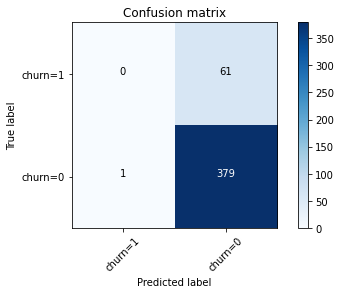

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

**Decision Tree**

In [ ]:
#Import DecisionTree Classifier model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train) 
y_pred = dt.predict(X_test)


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.782312925170068
Precision: 0.1568627450980392
Recall: 0.13114754098360656


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  8  53]
 [ 43 337]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  8  53]
 [ 43 337]]


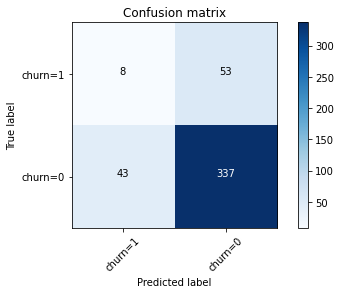

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

**Support Vector Machine**

In [ ]:
#Import Support Vector Machine Classifier model
from sklearn.svm import SVC
svm = SVC()
#Train the model using the training sets
svm.fit(X_train, y_train)
#svm_score = cross_val_score(svm_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
y_pred = svm.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8616780045351474
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  0  61]
 [  0 380]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  0  61]
 [  0 380]]


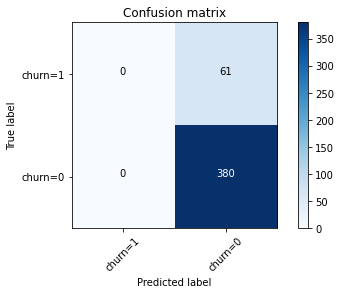

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

**Gradient Boosting Classifier**

In [ ]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8367346938775511
Precision: 0.3103448275862069
Recall: 0.14754098360655737


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  9  52]
 [ 20 360]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  9  52]
 [ 20 360]]


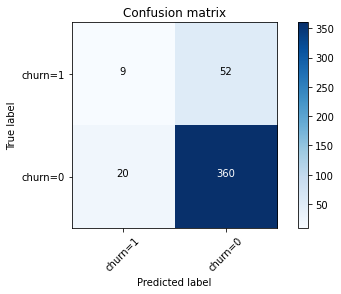

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

**Random Forest**

In [ ]:
#Import RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8367346938775511
Precision: 0.3103448275862069
Recall: 0.14754098360655737


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  9  52]
 [ 20 360]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  9  52]
 [ 20 360]]


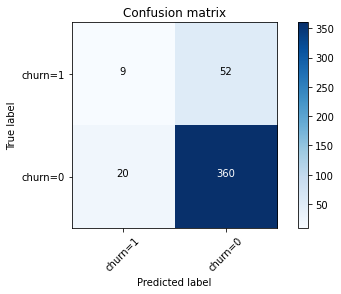

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Naive Bayes

In [ ]:
#Import NaiveBayesClassifier model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8140589569160998
Precision: 0.043478260869565216
Recall: 0.01639344262295082


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  1  60]
 [ 22 358]]


In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[  1  60]
 [ 22 358]]


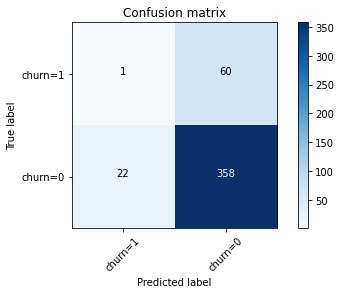

In [ ]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

Evaluating Model Performance

Accuracy: Accuracy (classification) rate of 83% (Gradient Boosting Classifier), 86%  (Logistic Regression). 

Precision: 
Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when you predicted an employee is going to leave, that employee actually left 95% (Gradient Boosting model), 49% (Logistic Regression) of the time. 

Recall: If there is an employee who left present in the test set and your model can identify it 92% (Gradient Boosting), 23% (Logistic Regression) of the time.
So which model is the better of the two?


In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       380
           1       0.04      0.02      0.02        61

    accuracy                           0.81       441
   macro avg       0.45      0.48      0.46       441
weighted avg       0.74      0.81      0.78       441



**Calculating the the Precision, Recall, and F Score**


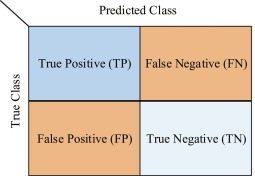

The most frequently used performance metrics for classification:

*Accuracy*

*Precision*

*Specificity*

*F-score*

*Accuracy* = (TP + TN) / (TP + FP + TN + FN)  

*Precision* = TP / (TP + FP)

*Recall* = TP / (TP + FN)

*Specifity* = TN / (TN + FP)

*F-score* = (2 x Precision x Recall) / (Precision + Recall) 
